<a href="https://colab.research.google.com/github/Barleysack/tensor101/blob/master/kerastutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [36]:

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [37]:
X_train_full.shape

(60000, 28, 28)

In [38]:

X_train_full.dtype

dtype('uint8')

In [39]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

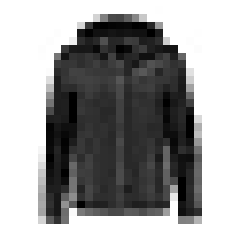

In [40]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [41]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [42]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [43]:
class_names[y_train[0]]

'Coat'

In [44]:
X_valid.shape

(5000, 28, 28)

In [45]:
X_test.shape

(10000, 28, 28)

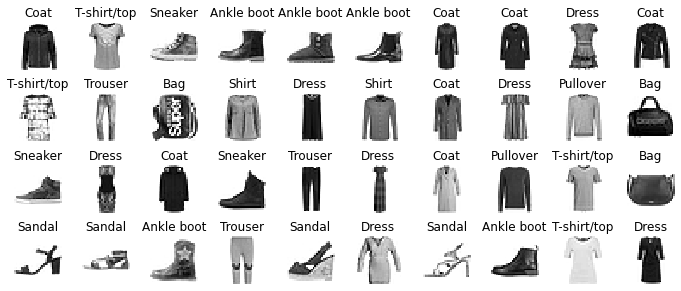

In [46]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

In [50]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [51]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


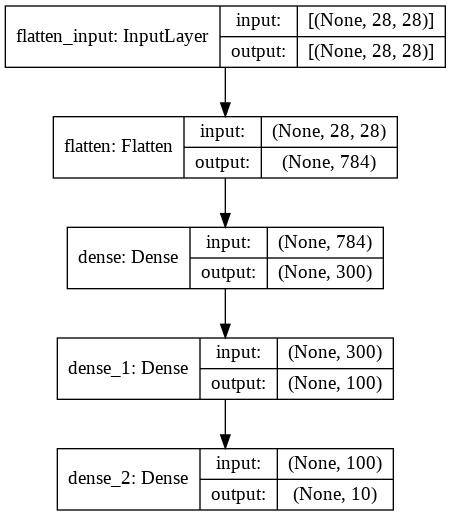

In [53]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [54]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [55]:
history= model.fit(X_train,y_train, epochs= 30,
          validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 1.0188 - accuracy: 0.6805 - val_loss: 0.5219 - val_accuracy: 0.8206
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5027 - accuracy: 0.8262 - val_loss: 0.4352 - val_accuracy: 0.8524
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4482 - accuracy: 0.8420 - val_loss: 0.5358 - val_accuracy: 0.7990
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4207 - accuracy: 0.8525 - val_loss: 0.3920 - val_accuracy: 0.8652
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4059 - accuracy: 0.8583 - val_loss: 0.3751 - val_accuracy: 0.8684
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3753 - accuracy: 0.8679 - val_loss: 0.3720 - val_accuracy: 0.8720
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3651 - accuracy: 0.8709 - val_loss: 0.3624 - val_accuracy:

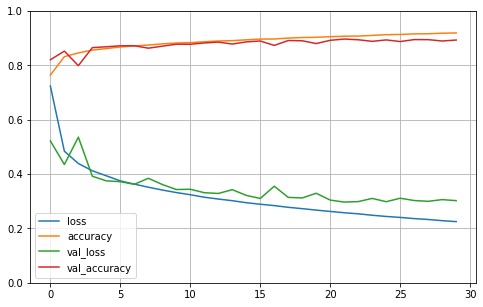

In [56]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [57]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3367 - accuracy: 0.8813


[0.3367043435573578, 0.8812999725341797]

In [66]:
X_new = X_test[:4]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.96],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [67]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1, 1])

In [68]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser'], dtype='<U11')

In [69]:
y_new = y_test[:4]
y_new

array([9, 2, 1, 1], dtype=uint8)

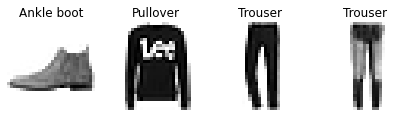

In [71]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 4, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()